In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from unicodedata import normalize
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow import keras
import html
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import seaborn as sns
import matplotlib.pyplot as ptl

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
import Consultas_entrenar as ent

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paula\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Recrea exactamente el mismo modelo solo desde el archivo
new_model = keras.models.load_model('modeloCrossVal.h5')

In [4]:
#cargar countVectorizer
import pickle
cv_loaded = pickle.load(open("countVectorizer", "rb"))

In [5]:
#Cargar los datos
evaluacion = pd.read_excel('evaluacion.xls')
#personas= pd.read_excel('datos\personas.xls')

In [6]:
evaluacion.head()

,Unnamed: 0,RECTIPDESC,RECDETOBSE,PERSEXO,PERSUBFAL,110,120,121,130,150,...,91,92,93,94,95,96,97,PER_COL_PRIV,edad,resideExt
0,9869,Títulos,"NUEVAMENTE COPIA DEL DNI, CBU Y CUIL",M,N,0,0,0,0,0,...,0,0,0,0,0,0,0,0,59.046575,0
1,15834,Mutuales,"BUEN DIA,ME DIRIJO A USTEDES PARA RECLAMAR QUE...",F,S,0,0,0,1,0,...,0,0,0,0,0,0,0,0,55.991781,0
2,18060,Trámite Pensión Web,se adjunta parte posterior Partida de Defunción.,F,S,0,0,0,0,0,...,0,0,0,0,0,0,0,0,70.468493,0
3,27281,Títulos,"hola, buenos dias. Quisiera que me informaras ...",F,S,1,0,0,0,0,...,0,0,0,0,0,0,0,0,69.084932,0
4,33120,Cambio Lugar de Pago,"Buenas tardes, la consulta es para mi abuela, ...",F,N,0,0,0,0,0,...,0,0,0,0,0,0,0,0,40.641096,0


In [7]:
#Normaliza el texto
corpus=ent.armar_bag_of_words(evaluacion['RECDETOBSE'])

In [8]:
#Aplica CountVectorizer al corpus normalizado
obse_vec=cv_loaded.transform(corpus).toarray()

In [9]:
#Unir el resultado del CountVectorizer con datos de personas
obse_vec=pd.DataFrame(obse_vec)
evaluacion=pd.get_dummies(evaluacion, columns=['PERSUBFAL'])
evaluacion=pd.get_dummies(evaluacion, columns=['PERSEXO'])
X=pd.concat([evaluacion.iloc[:, 3:], obse_vec], axis=1)
X=X.fillna(0)
X=X.astype('int32')

In [10]:
X.head()

,110,120,121,130,150,160,170,180,210,220,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Prediccion
new_predictions = new_model.predict(X)

In [12]:
#Evaluar prediccionn
y= evaluacion.iloc[:, 1].values
y=pd.get_dummies(y, columns=[0])

In [13]:
cm= confusion_matrix(y.values.argmax(axis=1), new_predictions.argmax(axis=1))
print(cm)
accuracy_score(y.values.argmax(axis=1), new_predictions.argmax(axis=1))

[[  2   0   0   0   1   0   0   1   0   0   0   0   0   0   8   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0 185   3   0   0   0   0   0   0   1   0   2   3   0  12   0   0   0
    2   0   0   1   0   0   1   0   1   4]
 [  0   2 112   0   1   0   0   1   0   0   0   0   1   0   0   1   0   0
    0   1   0   1   0   0   0   1   0   3]
 [  0   0   0  76   0   0   0   1   3   1   0   0   0   0   0   1   0   0
    0   0   0   0   3   0   0   0   0   3]
 [  0   1   1   0  62   0   0   0   0   4   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0  11   0   0   1   1   0   1   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   4   2]
 [  0   0   0   0   0   0  42   0   0   3   0   0   0   0   1   0   0   0
    0   0   0   7   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  59   0   1   0   2   0   0   0   2   0   0
    1   0   0   0   0   0   1   1   0   0]
 [  0   1   0   1   0   0   0   1  40   5   0   0   0   0   0   

0.8483952702702703

In [14]:
def crear_cong_table(cm):
    cm=pd.DataFrame(cm)
    cm.columns=y.columns
    cm.index=y.columns
    total= cm.iloc[:,:].sum(axis=1)
    contingency = np.empty((len(cm),len(cm.columns)))
    contingency=pd.DataFrame(contingency)
    for i in range(0,len(cm)):
        for j in range(0,len(cm.columns)):
            contingency.iloc[i,j]=cm.iloc[i,j]/total[i]

    sns.heatmap(contingency, cmap="YlGnBu")

    contingency.columns=y.columns
    contingency.index=y.columns
    contingency.to_excel('contingency.xls')

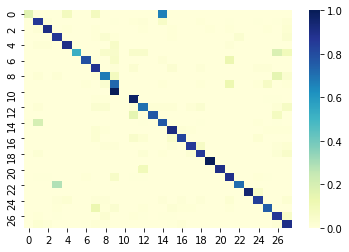

In [15]:
crear_cong_table(cm)

In [16]:
indices=new_predictions.argmax(axis=1)
porc=[]
for i in range(0,len(indices)):
    porc.append(new_predictions[i][indices[i]])

porc=pd.DataFrame(porc)  

In [17]:
pred=pd.DataFrame(y.columns[new_predictions.argmax(axis=1)])

In [20]:
final=pd.concat([pred, porc], axis=1)
final.columns=[ 'Prediccion','Porcentaje']
final=pd.concat([evaluacion.iloc[:,1:3], final], axis=1)

In [21]:
final.head()

,RECTIPDESC,RECDETOBSE,Prediccion,Porcentaje
0,Títulos,"NUEVAMENTE COPIA DEL DNI, CBU Y CUIL",Títulos,0.327750
1,Mutuales,"BUEN DIA,ME DIRIJO A USTEDES PARA RECLAMAR QUE...",Mutuales,0.997230
2,Trámite Pensión Web,se adjunta parte posterior Partida de Defunción.,Trámite Pensión Web,0.700014
3,Títulos,"hola, buenos dias. Quisiera que me informaras ...",Títulos,0.998307
4,Cambio Lugar de Pago,"Buenas tardes, la consulta es para mi abuela, ...",Cambio Lugar de Pago,0.490139


In [22]:
final.to_excel('final.xls')